In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf

%matplotlib inline
plt.style.use('ggplot')

In [9]:
def read_data(file_path):
    column_names = ['user-id','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
    data = pd.read_csv(file_path,header = None, names = column_names, comment=';')
    return data

def feature_normalize(dataset):
    mu = np.mean(dataset,axis = 0)
    sigma = np.std(dataset,axis = 0)
    return (dataset - mu)/sigma
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
def plot_activity(activity,data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (15, 10), sharex = True)
    plot_axis(ax0, data['timestamp'], data['x-axis'], 'x-axis')
    plot_axis(ax1, data['timestamp'], data['y-axis'], 'y-axis')
    plot_axis(ax2, data['timestamp'], data['z-axis'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def windows(data, size):
    start = 0
    while start < data.count():
        yield int(start), int(start + size)
        print(size)
        print(start)
        start += (size / 2)

def segment_signal(data,window_size = 90):
    segments = np.empty((0,window_size,3))
    labels = np.empty((0))
    for (start, end) in windows(data['timestamp'], window_size):
        x = data["x-axis"][start:end]
        y = data["y-axis"][start:end]
        z = data["z-axis"][start:end]
        if(len(dataset['timestamp'][start:end]) == window_size):
            segments = np.vstack([segments,np.dstack([x,y,z])])
            labels = np.append(labels,stats.mode(data["activity"][start:end])[0][0])
    return segments, labels

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.0, shape = shape)
    return tf.Variable(initial)

def depthwise_conv2d(x, W):
    return tf.nn.depthwise_conv2d(x,W, [1, 1, 1, 1], padding='VALID')

def apply_depthwise_conv(x,kernel_size,num_channels,depth):
    weights = weight_variable([1, kernel_size, num_channels, depth])
    biases = bias_variable([depth * num_channels])
    return tf.nn.relu(tf.add(depthwise_conv2d(x, weights),biases))
    
def apply_max_pool(x,kernel_size,stride_size):
    return tf.nn.max_pool(x, ksize=[1, 1, kernel_size, 1], 
                          strides=[1, 1, stride_size, 1], padding='VALID')

In [4]:
dataset =  read_data ('WISDM_ar_v1.1_raw.txt')
dataset['x-axis'] = feature_normalize(dataset['x-axis'])
dataset['y-axis'] = feature_normalize(dataset['y-axis'])
dataset['z-axis'] = feature_normalize(dataset['z-axis'])
dataset.dropna(axis=0, how='any', inplace= True)
dataset.drop_duplicates(['user-id','activity','timestamp', 'x-axis', 'y-axis', 'z-axis'], keep= 'first', inplace= True)

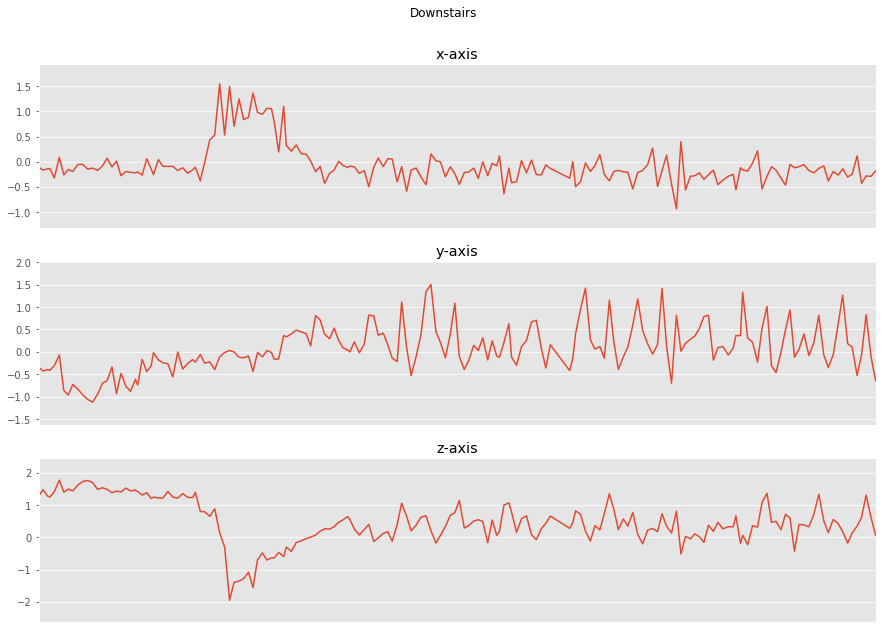

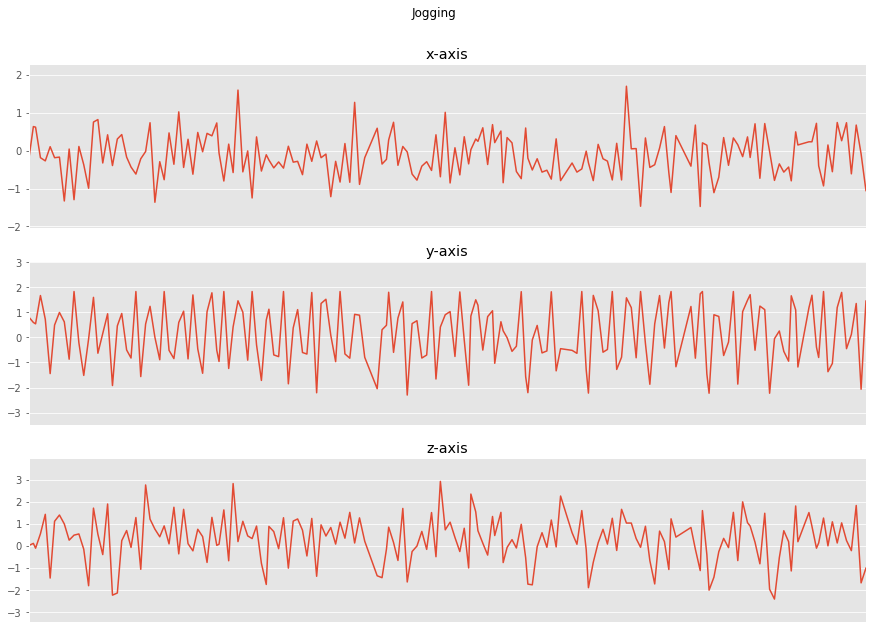

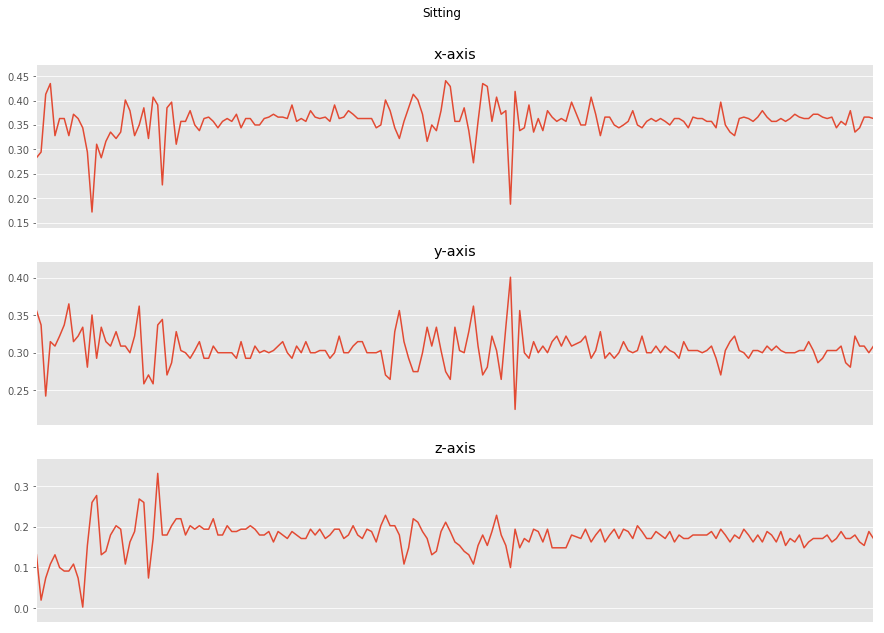

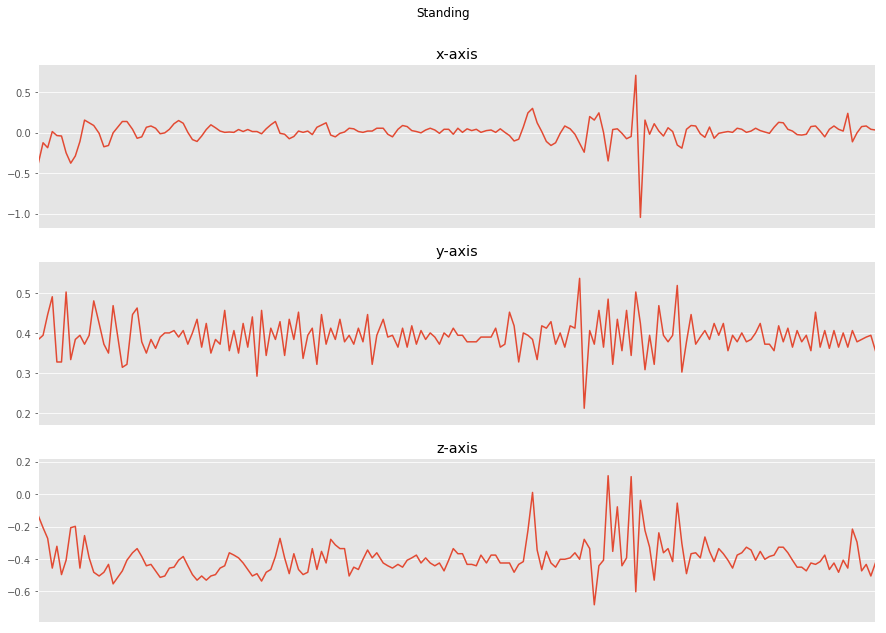

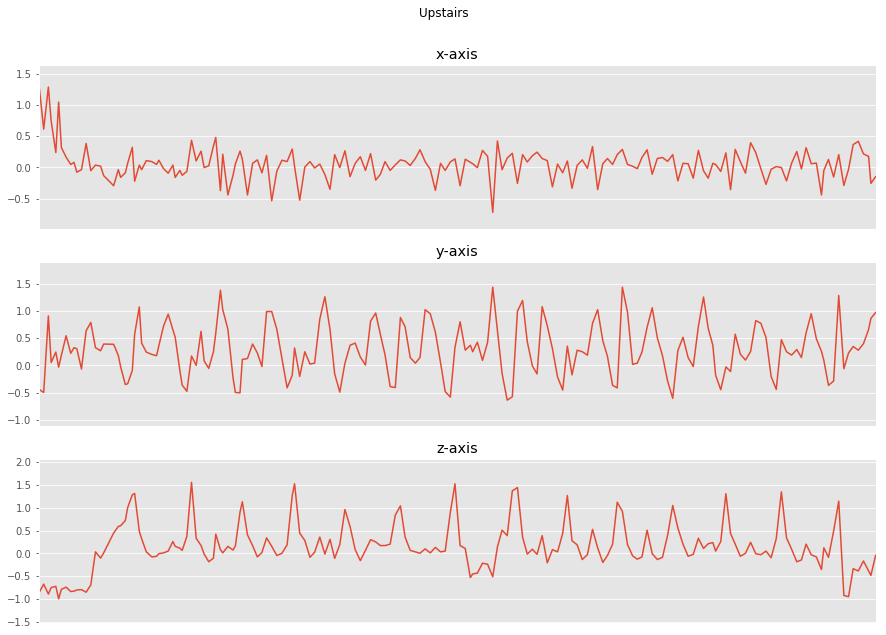

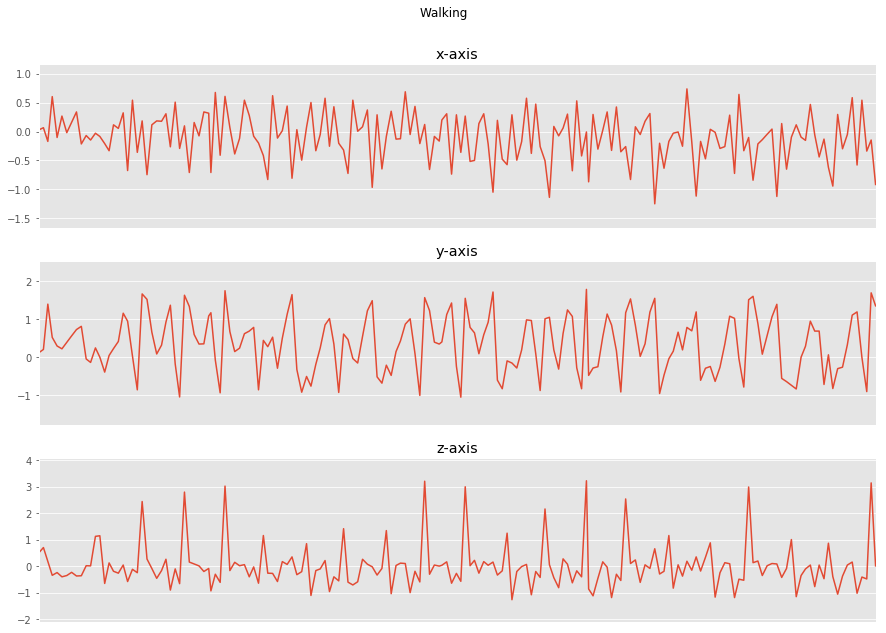

In [5]:
for activity in np.unique(dataset["activity"]):
    subset = dataset[dataset["activity"] == activity][:180]
    plot_activity(activity,subset)

In [10]:
segments, labels = segment_signal(dataset)
labels = np.asarray(pd.get_dummies(labels), dtype = np.int8)
reshaped_segments = segments.reshape(len(segments), 1,90, 3)

beginFor
inWindows
1031385
90
0
1031385
90
45.0
1031385
90
90.0
1031385
90
135.0
1031385
90
180.0
1031385
90
225.0
1031385
90
270.0
1031385
90
315.0
1031385
90
360.0
1031385
90
405.0
1031385
90
450.0
1031385
90
495.0
1031385
90
540.0
1031385
90
585.0
1031385
90
630.0
1031385
90
675.0
1031385
90
720.0
1031385
90
765.0
1031385
90
810.0
1031385
90
855.0
1031385
90
900.0
1031385
90
945.0
1031385
90
990.0
1031385
90
1035.0
1031385
90
1080.0
1031385
90
1125.0
1031385
90
1170.0
1031385
90
1215.0
1031385
90
1260.0
1031385
90
1305.0
1031385

c:\users\robertsonscot\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)



90
1350.0
1031385
90
1395.0
1031385
90
1440.0
1031385
90
1485.0
1031385
90
1530.0
1031385
90
1575.0
1031385
90
1620.0
1031385
90
1665.0
1031385
90
1710.0
1031385
90
1755.0
1031385
90
1800.0
1031385
90
1845.0
1031385
90
1890.0
1031385
90
1935.0
1031385
90
1980.0
1031385
90
2025.0
1031385
90
2070.0
1031385
90
2115.0
1031385
90
2160.0
1031385
90
2205.0
1031385
90
2250.0
1031385
90
2295.0
1031385
90
2340.0
1031385
90
2385.0
1031385
90
2430.0
1031385
90
2475.0
1031385
90
2520.0
1031385
90
2565.0
1031385
90
2610.0
1031385
90
2655.0
1031385
90
2700.0
1031385
90
2745.0
1031385
90
2790.0
1031385
90
2835.0
1031385
90
2880.0
1031385
90
2925.0
1031385
90
2970.0
1031385
90
3015.0
1031385
90
3060.0
1031385
90
3105.0
1031385
90
3150.0
1031385
90
3195.0
1031385
90
3240.0
1031385
90
3285.0
1031385
90
3330.0
1031385
90
3375.0
1031385
90
3420.0
1031385
90
3465.0
1031385
90
3510.0
1031385
90
3555.0
1031385
90
3600.0
1031385
90
3645.0
1031385
90
3690.0
1031385
90
3735.0
1031385
90
3780.0
1031385
90
3825.0

1031385
90
21735.0
1031385
90
21780.0
1031385
90
21825.0
1031385
90
21870.0
1031385
90
21915.0
1031385
90
21960.0
1031385
90
22005.0
1031385
90
22050.0
1031385
90
22095.0
1031385
90
22140.0
1031385
90
22185.0
1031385
90
22230.0
1031385
90
22275.0
1031385
90
22320.0
1031385
90
22365.0
1031385
90
22410.0
1031385
90
22455.0
1031385
90
22500.0
1031385
90
22545.0
1031385
90
22590.0
1031385
90
22635.0
1031385
90
22680.0
1031385
90
22725.0
1031385
90
22770.0
1031385
90
22815.0
1031385
90
22860.0
1031385
90
22905.0
1031385
90
22950.0
1031385
90
22995.0
1031385
90
23040.0
1031385
90
23085.0
1031385
90
23130.0
1031385
90
23175.0
1031385
90
23220.0
1031385
90
23265.0
1031385
90
23310.0
1031385
90
23355.0
1031385
90
23400.0
1031385
90
23445.0
1031385
90
23490.0
1031385
90
23535.0
1031385
90
23580.0
1031385
90
23625.0
1031385
90
23670.0
1031385
90
23715.0
1031385
90
23760.0
1031385
90
23805.0
1031385
90
23850.0
1031385
90
23895.0
1031385
90
23940.0
1031385
90
23985.0
1031385
90
24030.0
1031385
90
2

1031385
90
41175.0
1031385
90
41220.0
1031385
90
41265.0
1031385
90
41310.0
1031385
90
41355.0
1031385
90
41400.0
1031385
90
41445.0
1031385
90
41490.0
1031385
90
41535.0
1031385
90
41580.0
1031385
90
41625.0
1031385
90
41670.0
1031385
90
41715.0
1031385
90
41760.0
1031385
90
41805.0
1031385
90
41850.0
1031385
90
41895.0
1031385
90
41940.0
1031385
90
41985.0
1031385
90
42030.0
1031385
90
42075.0
1031385
90
42120.0
1031385
90
42165.0
1031385
90
42210.0
1031385
90
42255.0
1031385
90
42300.0
1031385
90
42345.0
1031385
90
42390.0
1031385
90
42435.0
1031385
90
42480.0
1031385
90
42525.0
1031385
90
42570.0
1031385
90
42615.0
1031385
90
42660.0
1031385
90
42705.0
1031385
90
42750.0
1031385
90
42795.0
1031385
90
42840.0
1031385
90
42885.0
1031385
90
42930.0
1031385
90
42975.0
1031385
90
43020.0
1031385
90
43065.0
1031385
90
43110.0
1031385
90
43155.0
1031385
90
43200.0
1031385
90
43245.0
1031385
90
43290.0
1031385
90
43335.0
1031385
90
43380.0
1031385
90
43425.0
1031385
90
43470.0
1031385
90
4

1031385
90
61110.0
1031385
90
61155.0
1031385
90
61200.0
1031385
90
61245.0
1031385
90
61290.0
1031385
90
61335.0
1031385
90
61380.0
1031385
90
61425.0
1031385
90
61470.0
1031385
90
61515.0
1031385
90
61560.0
1031385
90
61605.0
1031385
90
61650.0
1031385
90
61695.0
1031385
90
61740.0
1031385
90
61785.0
1031385
90
61830.0
1031385
90
61875.0
1031385
90
61920.0
1031385
90
61965.0
1031385
90
62010.0
1031385
90
62055.0
1031385
90
62100.0
1031385
90
62145.0
1031385
90
62190.0
1031385
90
62235.0
1031385
90
62280.0
1031385
90
62325.0
1031385
90
62370.0
1031385
90
62415.0
1031385
90
62460.0
1031385
90
62505.0
1031385
90
62550.0
1031385
90
62595.0
1031385
90
62640.0
1031385
90
62685.0
1031385
90
62730.0
1031385
90
62775.0
1031385
90
62820.0
1031385
90
62865.0
1031385
90
62910.0
1031385
90
62955.0
1031385
90
63000.0
1031385
90
63045.0
1031385
90
63090.0
1031385
90
63135.0
1031385
90
63180.0
1031385
90
63225.0
1031385
90
63270.0
1031385
90
63315.0
1031385
90
63360.0
1031385
90
63405.0
1031385
90
6

1031385
90
81495.0
1031385
90
81540.0
1031385
90
81585.0
1031385
90
81630.0
1031385
90
81675.0
1031385
90
81720.0
1031385
90
81765.0
1031385
90
81810.0
1031385
90
81855.0
1031385
90
81900.0
1031385
90
81945.0
1031385
90
81990.0
1031385
90
82035.0
1031385
90
82080.0
1031385
90
82125.0
1031385
90
82170.0
1031385
90
82215.0
1031385
90
82260.0
1031385
90
82305.0
1031385
90
82350.0
1031385
90
82395.0
1031385
90
82440.0
1031385
90
82485.0
1031385
90
82530.0
1031385
90
82575.0
1031385
90
82620.0
1031385
90
82665.0
1031385
90
82710.0
1031385
90
82755.0
1031385
90
82800.0
1031385
90
82845.0
1031385
90
82890.0
1031385
90
82935.0
1031385
90
82980.0
1031385
90
83025.0
1031385
90
83070.0
1031385
90
83115.0
1031385
90
83160.0
1031385
90
83205.0
1031385
90
83250.0
1031385
90
83295.0
1031385
90
83340.0
1031385
90
83385.0
1031385
90
83430.0
1031385
90
83475.0
1031385
90
83520.0
1031385
90
83565.0
1031385
90
83610.0
1031385
90
83655.0
1031385
90
83700.0
1031385
90
83745.0
1031385
90
83790.0
1031385
90
8

1031385
90
101655.0
1031385
90
101700.0
1031385
90
101745.0
1031385
90
101790.0
1031385
90
101835.0
1031385
90
101880.0
1031385
90
101925.0
1031385
90
101970.0
1031385
90
102015.0
1031385
90
102060.0
1031385
90
102105.0
1031385
90
102150.0
1031385
90
102195.0
1031385
90
102240.0
1031385
90
102285.0
1031385
90
102330.0
1031385
90
102375.0
1031385
90
102420.0
1031385
90
102465.0
1031385
90
102510.0
1031385
90
102555.0
1031385
90
102600.0
1031385
90
102645.0
1031385
90
102690.0
1031385
90
102735.0
1031385
90
102780.0
1031385
90
102825.0
1031385
90
102870.0
1031385
90
102915.0
1031385
90
102960.0
1031385
90
103005.0
1031385
90
103050.0
1031385
90
103095.0
1031385
90
103140.0
1031385
90
103185.0
1031385
90
103230.0
1031385
90
103275.0
1031385
90
103320.0
1031385
90
103365.0
1031385
90
103410.0
1031385
90
103455.0
1031385
90
103500.0
1031385
90
103545.0
1031385
90
103590.0
1031385
90
103635.0
1031385
90
103680.0
1031385
90
103725.0
1031385
90
103770.0
1031385
90
103815.0
1031385
90
103860.0


1031385
90
120240.0
1031385
90
120285.0
1031385
90
120330.0
1031385
90
120375.0
1031385
90
120420.0
1031385
90
120465.0
1031385
90
120510.0
1031385
90
120555.0
1031385
90
120600.0
1031385
90
120645.0
1031385
90
120690.0
1031385
90
120735.0
1031385
90
120780.0
1031385
90
120825.0
1031385
90
120870.0
1031385
90
120915.0
1031385
90
120960.0
1031385
90
121005.0
1031385
90
121050.0
1031385
90
121095.0
1031385
90
121140.0
1031385
90
121185.0
1031385
90
121230.0
1031385
90
121275.0
1031385
90
121320.0
1031385
90
121365.0
1031385
90
121410.0
1031385
90
121455.0
1031385
90
121500.0
1031385
90
121545.0
1031385
90
121590.0
1031385
90
121635.0
1031385
90
121680.0
1031385
90
121725.0
1031385
90
121770.0
1031385
90
121815.0
1031385
90
121860.0
1031385
90
121905.0
1031385
90
121950.0
1031385
90
121995.0
1031385
90
122040.0
1031385
90
122085.0
1031385
90
122130.0
1031385
90
122175.0
1031385
90
122220.0
1031385
90
122265.0
1031385
90
122310.0
1031385
90
122355.0
1031385
90
122400.0
1031385
90
122445.0


1031385
90
138780.0
1031385
90
138825.0
1031385
90
138870.0
1031385
90
138915.0
1031385
90
138960.0
1031385
90
139005.0
1031385
90
139050.0
1031385
90
139095.0
1031385
90
139140.0
1031385
90
139185.0
1031385
90
139230.0
1031385
90
139275.0
1031385
90
139320.0
1031385
90
139365.0
1031385
90
139410.0
1031385
90
139455.0
1031385
90
139500.0
1031385
90
139545.0
1031385
90
139590.0
1031385
90
139635.0
1031385
90
139680.0
1031385
90
139725.0
1031385
90
139770.0
1031385
90
139815.0
1031385
90
139860.0
1031385
90
139905.0
1031385
90
139950.0
1031385
90
139995.0
1031385
90
140040.0
1031385
90
140085.0
1031385
90
140130.0
1031385
90
140175.0
1031385
90
140220.0
1031385
90
140265.0
1031385
90
140310.0
1031385
90
140355.0
1031385
90
140400.0
1031385
90
140445.0
1031385
90
140490.0
1031385
90
140535.0
1031385
90
140580.0
1031385
90
140625.0
1031385
90
140670.0
1031385
90
140715.0
1031385
90
140760.0
1031385
90
140805.0
1031385
90
140850.0
1031385
90
140895.0
1031385
90
140940.0
1031385
90
140985.0


1031385
90
157275.0
1031385
90
157320.0
1031385
90
157365.0
1031385
90
157410.0
1031385
90
157455.0
1031385
90
157500.0
1031385
90
157545.0
1031385
90
157590.0
1031385
90
157635.0
1031385
90
157680.0
1031385
90
157725.0
1031385
90
157770.0
1031385
90
157815.0
1031385
90
157860.0
1031385
90
157905.0
1031385
90
157950.0
1031385
90
157995.0
1031385
90
158040.0
1031385
90
158085.0
1031385
90
158130.0
1031385
90
158175.0
1031385
90
158220.0
1031385
90
158265.0
1031385
90
158310.0
1031385
90
158355.0
1031385
90
158400.0
1031385
90
158445.0
1031385
90
158490.0
1031385
90
158535.0
1031385
90
158580.0
1031385
90
158625.0
1031385
90
158670.0
1031385
90
158715.0
1031385
90
158760.0
1031385
90
158805.0
1031385
90
158850.0
1031385
90
158895.0
1031385
90
158940.0
1031385
90
158985.0
1031385
90
159030.0
1031385
90
159075.0
1031385
90
159120.0
1031385
90
159165.0
1031385
90
159210.0
1031385
90
159255.0
1031385
90
159300.0
1031385
90
159345.0
1031385
90
159390.0
1031385
90
159435.0
1031385
90
159480.0


1031385
90
176040.0
1031385
90
176085.0
1031385
90
176130.0
1031385
90
176175.0
1031385
90
176220.0
1031385
90
176265.0
1031385
90
176310.0
1031385
90
176355.0
1031385
90
176400.0
1031385
90
176445.0
1031385
90
176490.0
1031385
90
176535.0
1031385
90
176580.0
1031385
90
176625.0
1031385
90
176670.0
1031385
90
176715.0
1031385
90
176760.0
1031385
90
176805.0
1031385
90
176850.0
1031385
90
176895.0
1031385
90
176940.0
1031385
90
176985.0
1031385
90
177030.0
1031385
90
177075.0
1031385
90
177120.0
1031385
90
177165.0
1031385
90
177210.0
1031385
90
177255.0
1031385
90
177300.0
1031385
90
177345.0
1031385
90
177390.0
1031385
90
177435.0
1031385
90
177480.0
1031385
90
177525.0
1031385
90
177570.0
1031385
90
177615.0
1031385
90
177660.0
1031385
90
177705.0
1031385
90
177750.0
1031385
90
177795.0
1031385
90
177840.0
1031385
90
177885.0
1031385
90
177930.0
1031385
90
177975.0
1031385
90
178020.0
1031385
90
178065.0
1031385
90
178110.0
1031385
90
178155.0
1031385
90
178200.0
1031385
90
178245.0


1031385
90
195255.0
1031385
90
195300.0
1031385
90
195345.0
1031385
90
195390.0
1031385
90
195435.0
1031385
90
195480.0
1031385
90
195525.0
1031385
90
195570.0
1031385
90
195615.0
1031385
90
195660.0
1031385
90
195705.0
1031385
90
195750.0
1031385
90
195795.0
1031385
90
195840.0
1031385
90
195885.0
1031385
90
195930.0
1031385
90
195975.0
1031385
90
196020.0
1031385
90
196065.0
1031385
90
196110.0
1031385
90
196155.0
1031385
90
196200.0
1031385
90
196245.0
1031385
90
196290.0
1031385
90
196335.0
1031385
90
196380.0
1031385
90
196425.0
1031385
90
196470.0
1031385
90
196515.0
1031385
90
196560.0
1031385
90
196605.0
1031385
90
196650.0
1031385
90
196695.0
1031385
90
196740.0
1031385
90
196785.0
1031385
90
196830.0
1031385
90
196875.0
1031385
90
196920.0
1031385
90
196965.0
1031385
90
197010.0
1031385
90
197055.0
1031385
90
197100.0
1031385
90
197145.0
1031385
90
197190.0
1031385
90
197235.0
1031385
90
197280.0
1031385
90
197325.0
1031385
90
197370.0
1031385
90
197415.0
1031385
90
197460.0


1031385
90
214200.0
1031385
90
214245.0
1031385
90
214290.0
1031385
90
214335.0
1031385
90
214380.0
1031385
90
214425.0
1031385
90
214470.0
1031385
90
214515.0
1031385
90
214560.0
1031385
90
214605.0
1031385
90
214650.0
1031385
90
214695.0
1031385
90
214740.0
1031385
90
214785.0
1031385
90
214830.0
1031385
90
214875.0
1031385
90
214920.0
1031385
90
214965.0
1031385
90
215010.0
1031385
90
215055.0
1031385
90
215100.0
1031385
90
215145.0
1031385
90
215190.0
1031385
90
215235.0
1031385
90
215280.0
1031385
90
215325.0
1031385
90
215370.0
1031385
90
215415.0
1031385
90
215460.0
1031385
90
215505.0
1031385
90
215550.0
1031385
90
215595.0
1031385
90
215640.0
1031385
90
215685.0
1031385
90
215730.0
1031385
90
215775.0
1031385
90
215820.0
1031385
90
215865.0
1031385
90
215910.0
1031385
90
215955.0
1031385
90
216000.0
1031385
90
216045.0
1031385
90
216090.0
1031385
90
216135.0
1031385
90
216180.0
1031385
90
216225.0
1031385
90
216270.0
1031385
90
216315.0
1031385
90
216360.0
1031385
90
216405.0


1031385
90
232785.0
1031385
90
232830.0
1031385
90
232875.0
1031385
90
232920.0
1031385
90
232965.0
1031385
90
233010.0
1031385
90
233055.0
1031385
90
233100.0
1031385
90
233145.0
1031385
90
233190.0
1031385
90
233235.0
1031385
90
233280.0
1031385
90
233325.0
1031385
90
233370.0
1031385
90
233415.0
1031385
90
233460.0
1031385
90
233505.0
1031385
90
233550.0
1031385
90
233595.0
1031385
90
233640.0
1031385
90
233685.0
1031385
90
233730.0
1031385
90
233775.0
1031385
90
233820.0
1031385
90
233865.0
1031385
90
233910.0
1031385
90
233955.0
1031385
90
234000.0
1031385
90
234045.0
1031385
90
234090.0
1031385
90
234135.0
1031385
90
234180.0
1031385
90
234225.0
1031385
90
234270.0
1031385
90
234315.0
1031385
90
234360.0
1031385
90
234405.0
1031385
90
234450.0
1031385
90
234495.0
1031385
90
234540.0
1031385
90
234585.0
1031385
90
234630.0
1031385
90
234675.0
1031385
90
234720.0
1031385
90
234765.0
1031385
90
234810.0
1031385
90
234855.0
1031385
90
234900.0
1031385
90
234945.0
1031385
90
234990.0


1031385
90
251775.0
1031385
90
251820.0
1031385
90
251865.0
1031385
90
251910.0
1031385
90
251955.0
1031385
90
252000.0
1031385
90
252045.0
1031385
90
252090.0
1031385
90
252135.0
1031385
90
252180.0
1031385
90
252225.0
1031385
90
252270.0
1031385
90
252315.0
1031385
90
252360.0
1031385
90
252405.0
1031385
90
252450.0
1031385
90
252495.0
1031385
90
252540.0
1031385
90
252585.0
1031385
90
252630.0
1031385
90
252675.0
1031385
90
252720.0
1031385
90
252765.0
1031385
90
252810.0
1031385
90
252855.0
1031385
90
252900.0
1031385
90
252945.0
1031385
90
252990.0
1031385
90
253035.0
1031385
90
253080.0
1031385
90
253125.0
1031385
90
253170.0
1031385
90
253215.0
1031385
90
253260.0
1031385
90
253305.0
1031385
90
253350.0
1031385
90
253395.0
1031385
90
253440.0
1031385
90
253485.0
1031385
90
253530.0
1031385
90
253575.0
1031385
90
253620.0
1031385
90
253665.0
1031385
90
253710.0
1031385
90
253755.0
1031385
90
253800.0
1031385
90
253845.0
1031385
90
253890.0
1031385
90
253935.0
1031385
90
253980.0


1031385
90
270270.0
1031385
90
270315.0
1031385
90
270360.0
1031385
90
270405.0
1031385
90
270450.0
1031385
90
270495.0
1031385
90
270540.0
1031385
90
270585.0
1031385
90
270630.0
1031385
90
270675.0
1031385
90
270720.0
1031385
90
270765.0
1031385
90
270810.0
1031385
90
270855.0
1031385
90
270900.0
1031385
90
270945.0
1031385
90
270990.0
1031385
90
271035.0
1031385
90
271080.0
1031385
90
271125.0
1031385
90
271170.0
1031385
90
271215.0
1031385
90
271260.0
1031385
90
271305.0
1031385
90
271350.0
1031385
90
271395.0
1031385
90
271440.0
1031385
90
271485.0
1031385
90
271530.0
1031385
90
271575.0
1031385
90
271620.0
1031385
90
271665.0
1031385
90
271710.0
1031385
90
271755.0
1031385
90
271800.0
1031385
90
271845.0
1031385
90
271890.0
1031385
90
271935.0
1031385
90
271980.0
1031385
90
272025.0
1031385
90
272070.0
1031385
90
272115.0
1031385
90
272160.0
1031385
90
272205.0
1031385
90
272250.0
1031385
90
272295.0
1031385
90
272340.0
1031385
90
272385.0
1031385
90
272430.0
1031385
90
272475.0


1031385
90
289350.0
1031385
90
289395.0
1031385
90
289440.0
1031385
90
289485.0
1031385
90
289530.0
1031385
90
289575.0
1031385
90
289620.0
1031385
90
289665.0
1031385
90
289710.0
1031385
90
289755.0
1031385
90
289800.0
1031385
90
289845.0
1031385
90
289890.0
1031385
90
289935.0
1031385
90
289980.0
1031385
90
290025.0
1031385
90
290070.0
1031385
90
290115.0
1031385
90
290160.0
1031385
90
290205.0
1031385
90
290250.0
1031385
90
290295.0
1031385
90
290340.0
1031385
90
290385.0
1031385
90
290430.0
1031385
90
290475.0
1031385
90
290520.0
1031385
90
290565.0
1031385
90
290610.0
1031385
90
290655.0
1031385
90
290700.0
1031385
90
290745.0
1031385
90
290790.0
1031385
90
290835.0
1031385
90
290880.0
1031385
90
290925.0
1031385
90
290970.0
1031385
90
291015.0
1031385
90
291060.0
1031385
90
291105.0
1031385
90
291150.0
1031385
90
291195.0
1031385
90
291240.0
1031385
90
291285.0
1031385
90
291330.0
1031385
90
291375.0
1031385
90
291420.0
1031385
90
291465.0
1031385
90
291510.0
1031385
90
291555.0


1031385
90
307935.0
1031385
90
307980.0
1031385
90
308025.0
1031385
90
308070.0
1031385
90
308115.0
1031385
90
308160.0
1031385
90
308205.0
1031385
90
308250.0
1031385
90
308295.0
1031385
90
308340.0
1031385
90
308385.0
1031385
90
308430.0
1031385
90
308475.0
1031385
90
308520.0
1031385
90
308565.0
1031385
90
308610.0
1031385
90
308655.0
1031385
90
308700.0
1031385
90
308745.0
1031385
90
308790.0
1031385
90
308835.0
1031385
90
308880.0
1031385
90
308925.0
1031385
90
308970.0
1031385
90
309015.0
1031385
90
309060.0
1031385
90
309105.0
1031385
90
309150.0
1031385
90
309195.0
1031385
90
309240.0
1031385
90
309285.0
1031385
90
309330.0
1031385
90
309375.0
1031385
90
309420.0
1031385
90
309465.0
1031385
90
309510.0
1031385
90
309555.0
1031385
90
309600.0
1031385
90
309645.0
1031385
90
309690.0
1031385
90
309735.0
1031385
90
309780.0
1031385
90
309825.0
1031385
90
309870.0
1031385
90
309915.0
1031385
90
309960.0
1031385
90
310005.0
1031385
90
310050.0
1031385
90
310095.0
1031385
90
310140.0


1031385
90
326925.0
1031385
90
326970.0
1031385
90
327015.0
1031385
90
327060.0
1031385
90
327105.0
1031385
90
327150.0
1031385
90
327195.0
1031385
90
327240.0
1031385
90
327285.0
1031385
90
327330.0
1031385
90
327375.0
1031385
90
327420.0
1031385
90
327465.0
1031385
90
327510.0
1031385
90
327555.0
1031385
90
327600.0
1031385
90
327645.0
1031385
90
327690.0
1031385
90
327735.0
1031385
90
327780.0
1031385
90
327825.0
1031385
90
327870.0
1031385
90
327915.0
1031385
90
327960.0
1031385
90
328005.0
1031385
90
328050.0
1031385
90
328095.0
1031385
90
328140.0
1031385
90
328185.0
1031385
90
328230.0
1031385
90
328275.0
1031385
90
328320.0
1031385
90
328365.0
1031385
90
328410.0
1031385
90
328455.0
1031385
90
328500.0
1031385
90
328545.0
1031385
90
328590.0
1031385
90
328635.0
1031385
90
328680.0
1031385
90
328725.0
1031385
90
328770.0
1031385
90
328815.0
1031385
90
328860.0
1031385
90
328905.0
1031385
90
328950.0
1031385
90
328995.0
1031385
90
329040.0
1031385
90
329085.0
1031385
90
329130.0


1031385
90
345915.0
1031385
90
345960.0
1031385
90
346005.0
1031385
90
346050.0
1031385
90
346095.0
1031385
90
346140.0
1031385
90
346185.0
1031385
90
346230.0
1031385
90
346275.0
1031385
90
346320.0
1031385
90
346365.0
1031385
90
346410.0
1031385
90
346455.0
1031385
90
346500.0
1031385
90
346545.0
1031385
90
346590.0
1031385
90
346635.0
1031385
90
346680.0
1031385
90
346725.0
1031385
90
346770.0
1031385
90
346815.0
1031385
90
346860.0
1031385
90
346905.0
1031385
90
346950.0
1031385
90
346995.0
1031385
90
347040.0
1031385
90
347085.0
1031385
90
347130.0
1031385
90
347175.0
1031385
90
347220.0
1031385
90
347265.0
1031385
90
347310.0
1031385
90
347355.0
1031385
90
347400.0
1031385
90
347445.0
1031385
90
347490.0
1031385
90
347535.0
1031385
90
347580.0
1031385
90
347625.0
1031385
90
347670.0
1031385
90
347715.0
1031385
90
347760.0
1031385
90
347805.0
1031385
90
347850.0
1031385
90
347895.0
1031385
90
347940.0
1031385
90
347985.0
1031385
90
348030.0
1031385
90
348075.0
1031385
90
348120.0


1031385
90
364365.0
1031385
90
364410.0
1031385
90
364455.0
1031385
90
364500.0
1031385
90
364545.0
1031385
90
364590.0
1031385
90
364635.0
1031385
90
364680.0
1031385
90
364725.0
1031385
90
364770.0
1031385
90
364815.0
1031385
90
364860.0
1031385
90
364905.0
1031385
90
364950.0
1031385
90
364995.0
1031385
90
365040.0
1031385
90
365085.0
1031385
90
365130.0
1031385
90
365175.0
1031385
90
365220.0
1031385
90
365265.0
1031385
90
365310.0
1031385
90
365355.0
1031385
90
365400.0
1031385
90
365445.0
1031385
90
365490.0
1031385
90
365535.0
1031385
90
365580.0
1031385
90
365625.0
1031385
90
365670.0
1031385
90
365715.0
1031385
90
365760.0
1031385
90
365805.0
1031385
90
365850.0
1031385
90
365895.0
1031385
90
365940.0
1031385
90
365985.0
1031385
90
366030.0
1031385
90
366075.0
1031385
90
366120.0
1031385
90
366165.0
1031385
90
366210.0
1031385
90
366255.0
1031385
90
366300.0
1031385
90
366345.0
1031385
90
366390.0
1031385
90
366435.0
1031385
90
366480.0
1031385
90
366525.0
1031385
90
366570.0


1031385
90
382950.0
1031385
90
382995.0
1031385
90
383040.0
1031385
90
383085.0
1031385
90
383130.0
1031385
90
383175.0
1031385
90
383220.0
1031385
90
383265.0
1031385
90
383310.0
1031385
90
383355.0
1031385
90
383400.0
1031385
90
383445.0
1031385
90
383490.0
1031385
90
383535.0
1031385
90
383580.0
1031385
90
383625.0
1031385
90
383670.0
1031385
90
383715.0
1031385
90
383760.0
1031385
90
383805.0
1031385
90
383850.0
1031385
90
383895.0
1031385
90
383940.0
1031385
90
383985.0
1031385
90
384030.0
1031385
90
384075.0
1031385
90
384120.0
1031385
90
384165.0
1031385
90
384210.0
1031385
90
384255.0
1031385
90
384300.0
1031385
90
384345.0
1031385
90
384390.0
1031385
90
384435.0
1031385
90
384480.0
1031385
90
384525.0
1031385
90
384570.0
1031385
90
384615.0
1031385
90
384660.0
1031385
90
384705.0
1031385
90
384750.0
1031385
90
384795.0
1031385
90
384840.0
1031385
90
384885.0
1031385
90
384930.0
1031385
90
384975.0
1031385
90
385020.0
1031385
90
385065.0
1031385
90
385110.0
1031385
90
385155.0


1031385
90
401580.0
1031385
90
401625.0
1031385
90
401670.0
1031385
90
401715.0
1031385
90
401760.0
1031385
90
401805.0
1031385
90
401850.0
1031385
90
401895.0
1031385
90
401940.0
1031385
90
401985.0
1031385
90
402030.0
1031385
90
402075.0
1031385
90
402120.0
1031385
90
402165.0
1031385
90
402210.0
1031385
90
402255.0
1031385
90
402300.0
1031385
90
402345.0
1031385
90
402390.0
1031385
90
402435.0
1031385
90
402480.0
1031385
90
402525.0
1031385
90
402570.0
1031385
90
402615.0
1031385
90
402660.0
1031385
90
402705.0
1031385
90
402750.0
1031385
90
402795.0
1031385
90
402840.0
1031385
90
402885.0
1031385
90
402930.0
1031385
90
402975.0
1031385
90
403020.0
1031385
90
403065.0
1031385
90
403110.0
1031385
90
403155.0
1031385
90
403200.0
1031385
90
403245.0
1031385
90
403290.0
1031385
90
403335.0
1031385
90
403380.0
1031385
90
403425.0
1031385
90
403470.0
1031385
90
403515.0
1031385
90
403560.0
1031385
90
403605.0
1031385
90
403650.0
1031385
90
403695.0
1031385
90
403740.0
1031385
90
403785.0


1031385
90
420030.0
1031385
90
420075.0
1031385
90
420120.0
1031385
90
420165.0
1031385
90
420210.0
1031385
90
420255.0
1031385
90
420300.0
1031385
90
420345.0
1031385
90
420390.0
1031385
90
420435.0
1031385
90
420480.0
1031385
90
420525.0
1031385
90
420570.0
1031385
90
420615.0
1031385
90
420660.0
1031385
90
420705.0
1031385
90
420750.0
1031385
90
420795.0
1031385
90
420840.0
1031385
90
420885.0
1031385
90
420930.0
1031385
90
420975.0
1031385
90
421020.0
1031385
90
421065.0
1031385
90
421110.0
1031385
90
421155.0
1031385
90
421200.0
1031385
90
421245.0
1031385
90
421290.0
1031385
90
421335.0
1031385
90
421380.0
1031385
90
421425.0
1031385
90
421470.0
1031385
90
421515.0
1031385
90
421560.0
1031385
90
421605.0
1031385
90
421650.0
1031385
90
421695.0
1031385
90
421740.0
1031385
90
421785.0
1031385
90
421830.0
1031385
90
421875.0
1031385
90
421920.0
1031385
90
421965.0
1031385
90
422010.0
1031385
90
422055.0
1031385
90
422100.0
1031385
90
422145.0
1031385
90
422190.0
1031385
90
422235.0


1031385
90
438615.0
1031385
90
438660.0
1031385
90
438705.0
1031385
90
438750.0
1031385
90
438795.0
1031385
90
438840.0
1031385
90
438885.0
1031385
90
438930.0
1031385
90
438975.0
1031385
90
439020.0
1031385
90
439065.0
1031385
90
439110.0
1031385
90
439155.0
1031385
90
439200.0
1031385
90
439245.0
1031385
90
439290.0
1031385
90
439335.0
1031385
90
439380.0
1031385
90
439425.0
1031385
90
439470.0
1031385
90
439515.0
1031385
90
439560.0
1031385
90
439605.0
1031385
90
439650.0
1031385
90
439695.0
1031385
90
439740.0
1031385
90
439785.0
1031385
90
439830.0
1031385
90
439875.0
1031385
90
439920.0
1031385
90
439965.0
1031385
90
440010.0
1031385
90
440055.0
1031385
90
440100.0
1031385
90
440145.0
1031385
90
440190.0
1031385
90
440235.0
1031385
90
440280.0
1031385
90
440325.0
1031385
90
440370.0
1031385
90
440415.0
1031385
90
440460.0
1031385
90
440505.0
1031385
90
440550.0
1031385
90
440595.0
1031385
90
440640.0
1031385
90
440685.0
1031385
90
440730.0
1031385
90
440775.0
1031385
90
440820.0


1031385
90
457425.0
1031385
90
457470.0
1031385
90
457515.0
1031385
90
457560.0
1031385
90
457605.0
1031385
90
457650.0
1031385
90
457695.0
1031385
90
457740.0
1031385
90
457785.0
1031385
90
457830.0
1031385
90
457875.0
1031385
90
457920.0
1031385
90
457965.0
1031385
90
458010.0
1031385
90
458055.0
1031385
90
458100.0
1031385
90
458145.0
1031385
90
458190.0
1031385
90
458235.0
1031385
90
458280.0
1031385
90
458325.0
1031385
90
458370.0
1031385
90
458415.0
1031385
90
458460.0
1031385
90
458505.0
1031385
90
458550.0
1031385
90
458595.0
1031385
90
458640.0
1031385
90
458685.0
1031385
90
458730.0
1031385
90
458775.0
1031385
90
458820.0
1031385
90
458865.0
1031385
90
458910.0
1031385
90
458955.0
1031385
90
459000.0
1031385
90
459045.0
1031385
90
459090.0
1031385
90
459135.0
1031385
90
459180.0
1031385
90
459225.0
1031385
90
459270.0
1031385
90
459315.0
1031385
90
459360.0
1031385
90
459405.0
1031385
90
459450.0
1031385
90
459495.0
1031385
90
459540.0
1031385
90
459585.0
1031385
90
459630.0


1031385
90
475875.0
1031385
90
475920.0
1031385
90
475965.0
1031385
90
476010.0
1031385
90
476055.0
1031385
90
476100.0
1031385
90
476145.0
1031385
90
476190.0
1031385
90
476235.0
1031385
90
476280.0
1031385
90
476325.0
1031385
90
476370.0
1031385
90
476415.0
1031385
90
476460.0
1031385
90
476505.0
1031385
90
476550.0
1031385
90
476595.0
1031385
90
476640.0
1031385
90
476685.0
1031385
90
476730.0
1031385
90
476775.0
1031385
90
476820.0
1031385
90
476865.0
1031385
90
476910.0
1031385
90
476955.0
1031385
90
477000.0
1031385
90
477045.0
1031385
90
477090.0
1031385
90
477135.0
1031385
90
477180.0
1031385
90
477225.0
1031385
90
477270.0
1031385
90
477315.0
1031385
90
477360.0
1031385
90
477405.0
1031385
90
477450.0
1031385
90
477495.0
1031385
90
477540.0
1031385
90
477585.0
1031385
90
477630.0
1031385
90
477675.0
1031385
90
477720.0
1031385
90
477765.0
1031385
90
477810.0
1031385
90
477855.0
1031385
90
477900.0
1031385
90
477945.0
1031385
90
477990.0
1031385
90
478035.0
1031385
90
478080.0


1031385
90
494460.0
1031385
90
494505.0
1031385
90
494550.0
1031385
90
494595.0
1031385
90
494640.0
1031385
90
494685.0
1031385
90
494730.0
1031385
90
494775.0
1031385
90
494820.0
1031385
90
494865.0
1031385
90
494910.0
1031385
90
494955.0
1031385
90
495000.0
1031385
90
495045.0
1031385
90
495090.0
1031385
90
495135.0
1031385
90
495180.0
1031385
90
495225.0
1031385
90
495270.0
1031385
90
495315.0
1031385
90
495360.0
1031385
90
495405.0
1031385
90
495450.0
1031385
90
495495.0
1031385
90
495540.0
1031385
90
495585.0
1031385
90
495630.0
1031385
90
495675.0
1031385
90
495720.0
1031385
90
495765.0
1031385
90
495810.0
1031385
90
495855.0
1031385
90
495900.0
1031385
90
495945.0
1031385
90
495990.0
1031385
90
496035.0
1031385
90
496080.0
1031385
90
496125.0
1031385
90
496170.0
1031385
90
496215.0
1031385
90
496260.0
1031385
90
496305.0
1031385
90
496350.0
1031385
90
496395.0
1031385
90
496440.0
1031385
90
496485.0
1031385
90
496530.0
1031385
90
496575.0
1031385
90
496620.0
1031385
90
496665.0


1031385
90
513225.0
1031385
90
513270.0
1031385
90
513315.0
1031385
90
513360.0
1031385
90
513405.0
1031385
90
513450.0
1031385
90
513495.0
1031385
90
513540.0
1031385
90
513585.0
1031385
90
513630.0
1031385
90
513675.0
1031385
90
513720.0
1031385
90
513765.0
1031385
90
513810.0
1031385
90
513855.0
1031385
90
513900.0
1031385
90
513945.0
1031385
90
513990.0
1031385
90
514035.0
1031385
90
514080.0
1031385
90
514125.0
1031385
90
514170.0
1031385
90
514215.0
1031385
90
514260.0
1031385
90
514305.0
1031385
90
514350.0
1031385
90
514395.0
1031385
90
514440.0
1031385
90
514485.0
1031385
90
514530.0
1031385
90
514575.0
1031385
90
514620.0
1031385
90
514665.0
1031385
90
514710.0
1031385
90
514755.0
1031385
90
514800.0
1031385
90
514845.0
1031385
90
514890.0
1031385
90
514935.0
1031385
90
514980.0
1031385
90
515025.0
1031385
90
515070.0
1031385
90
515115.0
1031385
90
515160.0
1031385
90
515205.0
1031385
90
515250.0
1031385
90
515295.0
1031385
90
515340.0
1031385
90
515385.0
1031385
90
515430.0


1031385
90
531900.0
1031385
90
531945.0
1031385
90
531990.0
1031385
90
532035.0
1031385
90
532080.0
1031385
90
532125.0
1031385
90
532170.0
1031385
90
532215.0
1031385
90
532260.0
1031385
90
532305.0
1031385
90
532350.0
1031385
90
532395.0
1031385
90
532440.0
1031385
90
532485.0
1031385
90
532530.0
1031385
90
532575.0
1031385
90
532620.0
1031385
90
532665.0
1031385
90
532710.0
1031385
90
532755.0
1031385
90
532800.0
1031385
90
532845.0
1031385
90
532890.0
1031385
90
532935.0
1031385
90
532980.0
1031385
90
533025.0
1031385
90
533070.0
1031385
90
533115.0
1031385
90
533160.0
1031385
90
533205.0
1031385
90
533250.0
1031385
90
533295.0
1031385
90
533340.0
1031385
90
533385.0
1031385
90
533430.0
1031385
90
533475.0
1031385
90
533520.0
1031385
90
533565.0
1031385
90
533610.0
1031385
90
533655.0
1031385
90
533700.0
1031385
90
533745.0
1031385
90
533790.0
1031385
90
533835.0
1031385
90
533880.0
1031385
90
533925.0
1031385
90
533970.0
1031385
90
534015.0
1031385
90
534060.0
1031385
90
534105.0


1031385
90
550575.0
1031385
90
550620.0
1031385
90
550665.0
1031385
90
550710.0
1031385
90
550755.0
1031385
90
550800.0
1031385
90
550845.0
1031385
90
550890.0
1031385
90
550935.0
1031385
90
550980.0
1031385
90
551025.0
1031385
90
551070.0
1031385
90
551115.0
1031385
90
551160.0
1031385
90
551205.0
1031385
90
551250.0
1031385
90
551295.0
1031385
90
551340.0
1031385
90
551385.0
1031385
90
551430.0
1031385
90
551475.0
1031385
90
551520.0
1031385
90
551565.0
1031385
90
551610.0
1031385
90
551655.0
1031385
90
551700.0
1031385
90
551745.0
1031385
90
551790.0
1031385
90
551835.0
1031385
90
551880.0
1031385
90
551925.0
1031385
90
551970.0
1031385
90
552015.0
1031385
90
552060.0
1031385
90
552105.0
1031385
90
552150.0
1031385
90
552195.0
1031385
90
552240.0
1031385
90
552285.0
1031385
90
552330.0
1031385
90
552375.0
1031385
90
552420.0
1031385
90
552465.0
1031385
90
552510.0
1031385
90
552555.0
1031385
90
552600.0
1031385
90
552645.0
1031385
90
552690.0
1031385
90
552735.0
1031385
90
552780.0


1031385
90
569295.0
1031385
90
569340.0
1031385
90
569385.0
1031385
90
569430.0
1031385
90
569475.0
1031385
90
569520.0
1031385
90
569565.0
1031385
90
569610.0
1031385
90
569655.0
1031385
90
569700.0
1031385
90
569745.0
1031385
90
569790.0
1031385
90
569835.0
1031385
90
569880.0
1031385
90
569925.0
1031385
90
569970.0
1031385
90
570015.0
1031385
90
570060.0
1031385
90
570105.0
1031385
90
570150.0
1031385
90
570195.0
1031385
90
570240.0
1031385
90
570285.0
1031385
90
570330.0
1031385
90
570375.0
1031385
90
570420.0
1031385
90
570465.0
1031385
90
570510.0
1031385
90
570555.0
1031385
90
570600.0
1031385
90
570645.0
1031385
90
570690.0
1031385
90
570735.0
1031385
90
570780.0
1031385
90
570825.0
1031385
90
570870.0
1031385
90
570915.0
1031385
90
570960.0
1031385
90
571005.0
1031385
90
571050.0
1031385
90
571095.0
1031385
90
571140.0
1031385
90
571185.0
1031385
90
571230.0
1031385
90
571275.0
1031385
90
571320.0
1031385
90
571365.0
1031385
90
571410.0
1031385
90
571455.0
1031385
90
571500.0


1031385
90
587970.0
1031385
90
588015.0
1031385
90
588060.0
1031385
90
588105.0
1031385
90
588150.0
1031385
90
588195.0
1031385
90
588240.0
1031385
90
588285.0
1031385
90
588330.0
1031385
90
588375.0
1031385
90
588420.0
1031385
90
588465.0
1031385
90
588510.0
1031385
90
588555.0
1031385
90
588600.0
1031385
90
588645.0
1031385
90
588690.0
1031385
90
588735.0
1031385
90
588780.0
1031385
90
588825.0
1031385
90
588870.0
1031385
90
588915.0
1031385
90
588960.0
1031385
90
589005.0
1031385
90
589050.0
1031385
90
589095.0
1031385
90
589140.0
1031385
90
589185.0
1031385
90
589230.0
1031385
90
589275.0
1031385
90
589320.0
1031385
90
589365.0
1031385
90
589410.0
1031385
90
589455.0
1031385
90
589500.0
1031385
90
589545.0
1031385
90
589590.0
1031385
90
589635.0
1031385
90
589680.0
1031385
90
589725.0
1031385
90
589770.0
1031385
90
589815.0
1031385
90
589860.0
1031385
90
589905.0
1031385
90
589950.0
1031385
90
589995.0
1031385
90
590040.0
1031385
90
590085.0
1031385
90
590130.0
1031385
90
590175.0


1031385
90
606735.0
1031385
90
606780.0
1031385
90
606825.0
1031385
90
606870.0
1031385
90
606915.0
1031385
90
606960.0
1031385
90
607005.0
1031385
90
607050.0
1031385
90
607095.0
1031385
90
607140.0
1031385
90
607185.0
1031385
90
607230.0
1031385
90
607275.0
1031385
90
607320.0
1031385
90
607365.0
1031385
90
607410.0
1031385
90
607455.0
1031385
90
607500.0
1031385
90
607545.0
1031385
90
607590.0
1031385
90
607635.0
1031385
90
607680.0
1031385
90
607725.0
1031385
90
607770.0
1031385
90
607815.0
1031385
90
607860.0
1031385
90
607905.0
1031385
90
607950.0
1031385
90
607995.0
1031385
90
608040.0
1031385
90
608085.0
1031385
90
608130.0
1031385
90
608175.0
1031385
90
608220.0
1031385
90
608265.0
1031385
90
608310.0
1031385
90
608355.0
1031385
90
608400.0
1031385
90
608445.0
1031385
90
608490.0
1031385
90
608535.0
1031385
90
608580.0
1031385
90
608625.0
1031385
90
608670.0
1031385
90
608715.0
1031385
90
608760.0
1031385
90
608805.0
1031385
90
608850.0
1031385
90
608895.0
1031385
90
608940.0


1031385
90
625365.0
1031385
90
625410.0
1031385
90
625455.0
1031385
90
625500.0
1031385
90
625545.0
1031385
90
625590.0
1031385
90
625635.0
1031385
90
625680.0
1031385
90
625725.0
1031385
90
625770.0
1031385
90
625815.0
1031385
90
625860.0
1031385
90
625905.0
1031385
90
625950.0
1031385
90
625995.0
1031385
90
626040.0
1031385
90
626085.0
1031385
90
626130.0
1031385
90
626175.0
1031385
90
626220.0
1031385
90
626265.0
1031385
90
626310.0
1031385
90
626355.0
1031385
90
626400.0
1031385
90
626445.0
1031385
90
626490.0
1031385
90
626535.0
1031385
90
626580.0
1031385
90
626625.0
1031385
90
626670.0
1031385
90
626715.0
1031385
90
626760.0
1031385
90
626805.0
1031385
90
626850.0
1031385
90
626895.0
1031385
90
626940.0
1031385
90
626985.0
1031385
90
627030.0
1031385
90
627075.0
1031385
90
627120.0
1031385
90
627165.0
1031385
90
627210.0
1031385
90
627255.0
1031385
90
627300.0
1031385
90
627345.0
1031385
90
627390.0
1031385
90
627435.0
1031385
90
627480.0
1031385
90
627525.0
1031385
90
627570.0


1031385
90
644175.0
1031385
90
644220.0
1031385
90
644265.0
1031385
90
644310.0
1031385
90
644355.0
1031385
90
644400.0
1031385
90
644445.0
1031385
90
644490.0
1031385
90
644535.0
1031385
90
644580.0
1031385
90
644625.0
1031385
90
644670.0
1031385
90
644715.0
1031385
90
644760.0
1031385
90
644805.0
1031385
90
644850.0
1031385
90
644895.0
1031385
90
644940.0
1031385
90
644985.0
1031385
90
645030.0
1031385
90
645075.0
1031385
90
645120.0
1031385
90
645165.0
1031385
90
645210.0
1031385
90
645255.0
1031385
90
645300.0
1031385
90
645345.0
1031385
90
645390.0
1031385
90
645435.0
1031385
90
645480.0
1031385
90
645525.0
1031385
90
645570.0
1031385
90
645615.0
1031385
90
645660.0
1031385
90
645705.0
1031385
90
645750.0
1031385
90
645795.0
1031385
90
645840.0
1031385
90
645885.0
1031385
90
645930.0
1031385
90
645975.0
1031385
90
646020.0
1031385
90
646065.0
1031385
90
646110.0
1031385
90
646155.0
1031385
90
646200.0
1031385
90
646245.0
1031385
90
646290.0
1031385
90
646335.0
1031385
90
646380.0


1031385
90
663030.0
1031385
90
663075.0
1031385
90
663120.0
1031385
90
663165.0
1031385
90
663210.0
1031385
90
663255.0
1031385
90
663300.0
1031385
90
663345.0
1031385
90
663390.0
1031385
90
663435.0
1031385
90
663480.0
1031385
90
663525.0
1031385
90
663570.0
1031385
90
663615.0
1031385
90
663660.0
1031385
90
663705.0
1031385
90
663750.0
1031385
90
663795.0
1031385
90
663840.0
1031385
90
663885.0
1031385
90
663930.0
1031385
90
663975.0
1031385
90
664020.0
1031385
90
664065.0
1031385
90
664110.0
1031385
90
664155.0
1031385
90
664200.0
1031385
90
664245.0
1031385
90
664290.0
1031385
90
664335.0
1031385
90
664380.0
1031385
90
664425.0
1031385
90
664470.0
1031385
90
664515.0
1031385
90
664560.0
1031385
90
664605.0
1031385
90
664650.0
1031385
90
664695.0
1031385
90
664740.0
1031385
90
664785.0
1031385
90
664830.0
1031385
90
664875.0
1031385
90
664920.0
1031385
90
664965.0
1031385
90
665010.0
1031385
90
665055.0
1031385
90
665100.0
1031385
90
665145.0
1031385
90
665190.0
1031385
90
665235.0


1031385
90
681840.0
1031385
90
681885.0
1031385
90
681930.0
1031385
90
681975.0
1031385
90
682020.0
1031385
90
682065.0
1031385
90
682110.0
1031385
90
682155.0
1031385
90
682200.0
1031385
90
682245.0
1031385
90
682290.0
1031385
90
682335.0
1031385
90
682380.0
1031385
90
682425.0
1031385
90
682470.0
1031385
90
682515.0
1031385
90
682560.0
1031385
90
682605.0
1031385
90
682650.0
1031385
90
682695.0
1031385
90
682740.0
1031385
90
682785.0
1031385
90
682830.0
1031385
90
682875.0
1031385
90
682920.0
1031385
90
682965.0
1031385
90
683010.0
1031385
90
683055.0
1031385
90
683100.0
1031385
90
683145.0
1031385
90
683190.0
1031385
90
683235.0
1031385
90
683280.0
1031385
90
683325.0
1031385
90
683370.0
1031385
90
683415.0
1031385
90
683460.0
1031385
90
683505.0
1031385
90
683550.0
1031385
90
683595.0
1031385
90
683640.0
1031385
90
683685.0
1031385
90
683730.0
1031385
90
683775.0
1031385
90
683820.0
1031385
90
683865.0
1031385
90
683910.0
1031385
90
683955.0
1031385
90
684000.0
1031385
90
684045.0


1031385
90
700515.0
1031385
90
700560.0
1031385
90
700605.0
1031385
90
700650.0
1031385
90
700695.0
1031385
90
700740.0
1031385
90
700785.0
1031385
90
700830.0
1031385
90
700875.0
1031385
90
700920.0
1031385
90
700965.0
1031385
90
701010.0
1031385
90
701055.0
1031385
90
701100.0
1031385
90
701145.0
1031385
90
701190.0
1031385
90
701235.0
1031385
90
701280.0
1031385
90
701325.0
1031385
90
701370.0
1031385
90
701415.0
1031385
90
701460.0
1031385
90
701505.0
1031385
90
701550.0
1031385
90
701595.0
1031385
90
701640.0
1031385
90
701685.0
1031385
90
701730.0
1031385
90
701775.0
1031385
90
701820.0
1031385
90
701865.0
1031385
90
701910.0
1031385
90
701955.0
1031385
90
702000.0
1031385
90
702045.0
1031385
90
702090.0
1031385
90
702135.0
1031385
90
702180.0
1031385
90
702225.0
1031385
90
702270.0
1031385
90
702315.0
1031385
90
702360.0
1031385
90
702405.0
1031385
90
702450.0
1031385
90
702495.0
1031385
90
702540.0
1031385
90
702585.0
1031385
90
702630.0
1031385
90
702675.0
1031385
90
702720.0


1031385
90
719145.0
1031385
90
719190.0
1031385
90
719235.0
1031385
90
719280.0
1031385
90
719325.0
1031385
90
719370.0
1031385
90
719415.0
1031385
90
719460.0
1031385
90
719505.0
1031385
90
719550.0
1031385
90
719595.0
1031385
90
719640.0
1031385
90
719685.0
1031385
90
719730.0
1031385
90
719775.0
1031385
90
719820.0
1031385
90
719865.0
1031385
90
719910.0
1031385
90
719955.0
1031385
90
720000.0
1031385
90
720045.0
1031385
90
720090.0
1031385
90
720135.0
1031385
90
720180.0
1031385
90
720225.0
1031385
90
720270.0
1031385
90
720315.0
1031385
90
720360.0
1031385
90
720405.0
1031385
90
720450.0
1031385
90
720495.0
1031385
90
720540.0
1031385
90
720585.0
1031385
90
720630.0
1031385
90
720675.0
1031385
90
720720.0
1031385
90
720765.0
1031385
90
720810.0
1031385
90
720855.0
1031385
90
720900.0
1031385
90
720945.0
1031385
90
720990.0
1031385
90
721035.0
1031385
90
721080.0
1031385
90
721125.0
1031385
90
721170.0
1031385
90
721215.0
1031385
90
721260.0
1031385
90
721305.0
1031385
90
721350.0


1031385
90
737640.0
1031385
90
737685.0
1031385
90
737730.0
1031385
90
737775.0
1031385
90
737820.0
1031385
90
737865.0
1031385
90
737910.0
1031385
90
737955.0
1031385
90
738000.0
1031385
90
738045.0
1031385
90
738090.0
1031385
90
738135.0
1031385
90
738180.0
1031385
90
738225.0
1031385
90
738270.0
1031385
90
738315.0
1031385
90
738360.0
1031385
90
738405.0
1031385
90
738450.0
1031385
90
738495.0
1031385
90
738540.0
1031385
90
738585.0
1031385
90
738630.0
1031385
90
738675.0
1031385
90
738720.0
1031385
90
738765.0
1031385
90
738810.0
1031385
90
738855.0
1031385
90
738900.0
1031385
90
738945.0
1031385
90
738990.0
1031385
90
739035.0
1031385
90
739080.0
1031385
90
739125.0
1031385
90
739170.0
1031385
90
739215.0
1031385
90
739260.0
1031385
90
739305.0
1031385
90
739350.0
1031385
90
739395.0
1031385
90
739440.0
1031385
90
739485.0
1031385
90
739530.0
1031385
90
739575.0
1031385
90
739620.0
1031385
90
739665.0
1031385
90
739710.0
1031385
90
739755.0
1031385
90
739800.0
1031385
90
739845.0


1031385
90
756315.0
1031385
90
756360.0
1031385
90
756405.0
1031385
90
756450.0
1031385
90
756495.0
1031385
90
756540.0
1031385
90
756585.0
1031385
90
756630.0
1031385
90
756675.0
1031385
90
756720.0
1031385
90
756765.0
1031385
90
756810.0
1031385
90
756855.0
1031385
90
756900.0
1031385
90
756945.0
1031385
90
756990.0
1031385
90
757035.0
1031385
90
757080.0
1031385
90
757125.0
1031385
90
757170.0
1031385
90
757215.0
1031385
90
757260.0
1031385
90
757305.0
1031385
90
757350.0
1031385
90
757395.0
1031385
90
757440.0
1031385
90
757485.0
1031385
90
757530.0
1031385
90
757575.0
1031385
90
757620.0
1031385
90
757665.0
1031385
90
757710.0
1031385
90
757755.0
1031385
90
757800.0
1031385
90
757845.0
1031385
90
757890.0
1031385
90
757935.0
1031385
90
757980.0
1031385
90
758025.0
1031385
90
758070.0
1031385
90
758115.0
1031385
90
758160.0
1031385
90
758205.0
1031385
90
758250.0
1031385
90
758295.0
1031385
90
758340.0
1031385
90
758385.0
1031385
90
758430.0
1031385
90
758475.0
1031385
90
758520.0


1031385
90
774900.0
1031385
90
774945.0
1031385
90
774990.0
1031385
90
775035.0
1031385
90
775080.0
1031385
90
775125.0
1031385
90
775170.0
1031385
90
775215.0
1031385
90
775260.0
1031385
90
775305.0
1031385
90
775350.0
1031385
90
775395.0
1031385
90
775440.0
1031385
90
775485.0
1031385
90
775530.0
1031385
90
775575.0
1031385
90
775620.0
1031385
90
775665.0
1031385
90
775710.0
1031385
90
775755.0
1031385
90
775800.0
1031385
90
775845.0
1031385
90
775890.0
1031385
90
775935.0
1031385
90
775980.0
1031385
90
776025.0
1031385
90
776070.0
1031385
90
776115.0
1031385
90
776160.0
1031385
90
776205.0
1031385
90
776250.0
1031385
90
776295.0
1031385
90
776340.0
1031385
90
776385.0
1031385
90
776430.0
1031385
90
776475.0
1031385
90
776520.0
1031385
90
776565.0
1031385
90
776610.0
1031385
90
776655.0
1031385
90
776700.0
1031385
90
776745.0
1031385
90
776790.0
1031385
90
776835.0
1031385
90
776880.0
1031385
90
776925.0
1031385
90
776970.0
1031385
90
777015.0
1031385
90
777060.0
1031385
90
777105.0


1031385
90
793485.0
1031385
90
793530.0
1031385
90
793575.0
1031385
90
793620.0
1031385
90
793665.0
1031385
90
793710.0
1031385
90
793755.0
1031385
90
793800.0
1031385
90
793845.0
1031385
90
793890.0
1031385
90
793935.0
1031385
90
793980.0
1031385
90
794025.0
1031385
90
794070.0
1031385
90
794115.0
1031385
90
794160.0
1031385
90
794205.0
1031385
90
794250.0
1031385
90
794295.0
1031385
90
794340.0
1031385
90
794385.0
1031385
90
794430.0
1031385
90
794475.0
1031385
90
794520.0
1031385
90
794565.0
1031385
90
794610.0
1031385
90
794655.0
1031385
90
794700.0
1031385
90
794745.0
1031385
90
794790.0
1031385
90
794835.0
1031385
90
794880.0
1031385
90
794925.0
1031385
90
794970.0
1031385
90
795015.0
1031385
90
795060.0
1031385
90
795105.0
1031385
90
795150.0
1031385
90
795195.0
1031385
90
795240.0
1031385
90
795285.0
1031385
90
795330.0
1031385
90
795375.0
1031385
90
795420.0
1031385
90
795465.0
1031385
90
795510.0
1031385
90
795555.0
1031385
90
795600.0
1031385
90
795645.0
1031385
90
795690.0


1031385
90
812250.0
1031385
90
812295.0
1031385
90
812340.0
1031385
90
812385.0
1031385
90
812430.0
1031385
90
812475.0
1031385
90
812520.0
1031385
90
812565.0
1031385
90
812610.0
1031385
90
812655.0
1031385
90
812700.0
1031385
90
812745.0
1031385
90
812790.0
1031385
90
812835.0
1031385
90
812880.0
1031385
90
812925.0
1031385
90
812970.0
1031385
90
813015.0
1031385
90
813060.0
1031385
90
813105.0
1031385
90
813150.0
1031385
90
813195.0
1031385
90
813240.0
1031385
90
813285.0
1031385
90
813330.0
1031385
90
813375.0
1031385
90
813420.0
1031385
90
813465.0
1031385
90
813510.0
1031385
90
813555.0
1031385
90
813600.0
1031385
90
813645.0
1031385
90
813690.0
1031385
90
813735.0
1031385
90
813780.0
1031385
90
813825.0
1031385
90
813870.0
1031385
90
813915.0
1031385
90
813960.0
1031385
90
814005.0
1031385
90
814050.0
1031385
90
814095.0
1031385
90
814140.0
1031385
90
814185.0
1031385
90
814230.0
1031385
90
814275.0
1031385
90
814320.0
1031385
90
814365.0
1031385
90
814410.0
1031385
90
814455.0


1031385
90
830970.0
1031385
90
831015.0
1031385
90
831060.0
1031385
90
831105.0
1031385
90
831150.0
1031385
90
831195.0
1031385
90
831240.0
1031385
90
831285.0
1031385
90
831330.0
1031385
90
831375.0
1031385
90
831420.0
1031385
90
831465.0
1031385
90
831510.0
1031385
90
831555.0
1031385
90
831600.0
1031385
90
831645.0
1031385
90
831690.0
1031385
90
831735.0
1031385
90
831780.0
1031385
90
831825.0
1031385
90
831870.0
1031385
90
831915.0
1031385
90
831960.0
1031385
90
832005.0
1031385
90
832050.0
1031385
90
832095.0
1031385
90
832140.0
1031385
90
832185.0
1031385
90
832230.0
1031385
90
832275.0
1031385
90
832320.0
1031385
90
832365.0
1031385
90
832410.0
1031385
90
832455.0
1031385
90
832500.0
1031385
90
832545.0
1031385
90
832590.0
1031385
90
832635.0
1031385
90
832680.0
1031385
90
832725.0
1031385
90
832770.0
1031385
90
832815.0
1031385
90
832860.0
1031385
90
832905.0
1031385
90
832950.0
1031385
90
832995.0
1031385
90
833040.0
1031385
90
833085.0
1031385
90
833130.0
1031385
90
833175.0


1031385
90
849600.0
1031385
90
849645.0
1031385
90
849690.0
1031385
90
849735.0
1031385
90
849780.0
1031385
90
849825.0
1031385
90
849870.0
1031385
90
849915.0
1031385
90
849960.0
1031385
90
850005.0
1031385
90
850050.0
1031385
90
850095.0
1031385
90
850140.0
1031385
90
850185.0
1031385
90
850230.0
1031385
90
850275.0
1031385
90
850320.0
1031385
90
850365.0
1031385
90
850410.0
1031385
90
850455.0
1031385
90
850500.0
1031385
90
850545.0
1031385
90
850590.0
1031385
90
850635.0
1031385
90
850680.0
1031385
90
850725.0
1031385
90
850770.0
1031385
90
850815.0
1031385
90
850860.0
1031385
90
850905.0
1031385
90
850950.0
1031385
90
850995.0
1031385
90
851040.0
1031385
90
851085.0
1031385
90
851130.0
1031385
90
851175.0
1031385
90
851220.0
1031385
90
851265.0
1031385
90
851310.0
1031385
90
851355.0
1031385
90
851400.0
1031385
90
851445.0
1031385
90
851490.0
1031385
90
851535.0
1031385
90
851580.0
1031385
90
851625.0
1031385
90
851670.0
1031385
90
851715.0
1031385
90
851760.0
1031385
90
851805.0


1031385
90
868320.0
1031385
90
868365.0
1031385
90
868410.0
1031385
90
868455.0
1031385
90
868500.0
1031385
90
868545.0
1031385
90
868590.0
1031385
90
868635.0
1031385
90
868680.0
1031385
90
868725.0
1031385
90
868770.0
1031385
90
868815.0
1031385
90
868860.0
1031385
90
868905.0
1031385
90
868950.0
1031385
90
868995.0
1031385
90
869040.0
1031385
90
869085.0
1031385
90
869130.0
1031385
90
869175.0
1031385
90
869220.0
1031385
90
869265.0
1031385
90
869310.0
1031385
90
869355.0
1031385
90
869400.0
1031385
90
869445.0
1031385
90
869490.0
1031385
90
869535.0
1031385
90
869580.0
1031385
90
869625.0
1031385
90
869670.0
1031385
90
869715.0
1031385
90
869760.0
1031385
90
869805.0
1031385
90
869850.0
1031385
90
869895.0
1031385
90
869940.0
1031385
90
869985.0
1031385
90
870030.0
1031385
90
870075.0
1031385
90
870120.0
1031385
90
870165.0
1031385
90
870210.0
1031385
90
870255.0
1031385
90
870300.0
1031385
90
870345.0
1031385
90
870390.0
1031385
90
870435.0
1031385
90
870480.0
1031385
90
870525.0


1031385
90
886950.0
1031385
90
886995.0
1031385
90
887040.0
1031385
90
887085.0
1031385
90
887130.0
1031385
90
887175.0
1031385
90
887220.0
1031385
90
887265.0
1031385
90
887310.0
1031385
90
887355.0
1031385
90
887400.0
1031385
90
887445.0
1031385
90
887490.0
1031385
90
887535.0
1031385
90
887580.0
1031385
90
887625.0
1031385
90
887670.0
1031385
90
887715.0
1031385
90
887760.0
1031385
90
887805.0
1031385
90
887850.0
1031385
90
887895.0
1031385
90
887940.0
1031385
90
887985.0
1031385
90
888030.0
1031385
90
888075.0
1031385
90
888120.0
1031385
90
888165.0
1031385
90
888210.0
1031385
90
888255.0
1031385
90
888300.0
1031385
90
888345.0
1031385
90
888390.0
1031385
90
888435.0
1031385
90
888480.0
1031385
90
888525.0
1031385
90
888570.0
1031385
90
888615.0
1031385
90
888660.0
1031385
90
888705.0
1031385
90
888750.0
1031385
90
888795.0
1031385
90
888840.0
1031385
90
888885.0
1031385
90
888930.0
1031385
90
888975.0
1031385
90
889020.0
1031385
90
889065.0
1031385
90
889110.0
1031385
90
889155.0


1031385
90
905580.0
1031385
90
905625.0
1031385
90
905670.0
1031385
90
905715.0
1031385
90
905760.0
1031385
90
905805.0
1031385
90
905850.0
1031385
90
905895.0
1031385
90
905940.0
1031385
90
905985.0
1031385
90
906030.0
1031385
90
906075.0
1031385
90
906120.0
1031385
90
906165.0
1031385
90
906210.0
1031385
90
906255.0
1031385
90
906300.0
1031385
90
906345.0
1031385
90
906390.0
1031385
90
906435.0
1031385
90
906480.0
1031385
90
906525.0
1031385
90
906570.0
1031385
90
906615.0
1031385
90
906660.0
1031385
90
906705.0
1031385
90
906750.0
1031385
90
906795.0
1031385
90
906840.0
1031385
90
906885.0
1031385
90
906930.0
1031385
90
906975.0
1031385
90
907020.0
1031385
90
907065.0
1031385
90
907110.0
1031385
90
907155.0
1031385
90
907200.0
1031385
90
907245.0
1031385
90
907290.0
1031385
90
907335.0
1031385
90
907380.0
1031385
90
907425.0
1031385
90
907470.0
1031385
90
907515.0
1031385
90
907560.0
1031385
90
907605.0
1031385
90
907650.0
1031385
90
907695.0
1031385
90
907740.0
1031385
90
907785.0


1031385
90
924300.0
1031385
90
924345.0
1031385
90
924390.0
1031385
90
924435.0
1031385
90
924480.0
1031385
90
924525.0
1031385
90
924570.0
1031385
90
924615.0
1031385
90
924660.0
1031385
90
924705.0
1031385
90
924750.0
1031385
90
924795.0
1031385
90
924840.0
1031385
90
924885.0
1031385
90
924930.0
1031385
90
924975.0
1031385
90
925020.0
1031385
90
925065.0
1031385
90
925110.0
1031385
90
925155.0
1031385
90
925200.0
1031385
90
925245.0
1031385
90
925290.0
1031385
90
925335.0
1031385
90
925380.0
1031385
90
925425.0
1031385
90
925470.0
1031385
90
925515.0
1031385
90
925560.0
1031385
90
925605.0
1031385
90
925650.0
1031385
90
925695.0
1031385
90
925740.0
1031385
90
925785.0
1031385
90
925830.0
1031385
90
925875.0
1031385
90
925920.0
1031385
90
925965.0
1031385
90
926010.0
1031385
90
926055.0
1031385
90
926100.0
1031385
90
926145.0
1031385
90
926190.0
1031385
90
926235.0
1031385
90
926280.0
1031385
90
926325.0
1031385
90
926370.0
1031385
90
926415.0
1031385
90
926460.0
1031385
90
926505.0


942885.0
1031385
90
942930.0
1031385
90
942975.0
1031385
90
943020.0
1031385
90
943065.0
1031385
90
943110.0
1031385
90
943155.0
1031385
90
943200.0
1031385
90
943245.0
1031385
90
943290.0
1031385
90
943335.0
1031385
90
943380.0
1031385
90
943425.0
1031385
90
943470.0
1031385
90
943515.0
1031385
90
943560.0
1031385
90
943605.0
1031385
90
943650.0
1031385
90
943695.0
1031385
90
943740.0
1031385
90
943785.0
1031385
90
943830.0
1031385
90
943875.0
1031385
90
943920.0
1031385
90
943965.0
1031385
90
944010.0
1031385
90
944055.0
1031385
90
944100.0
1031385
90
944145.0
1031385
90
944190.0
1031385
90
944235.0
1031385
90
944280.0
1031385
90
944325.0
1031385
90
944370.0
1031385
90
944415.0
1031385
90
944460.0
1031385
90
944505.0
1031385
90
944550.0
1031385
90
944595.0
1031385
90
944640.0
1031385
90
944685.0
1031385
90
944730.0
1031385
90
944775.0
1031385
90
944820.0
1031385
90
944865.0
1031385
90
944910.0
1031385
90
944955.0
1031385
90
945000.0
1031385
90
945045.0
1031385
90
945090.0
1031385
90


1031385
90
961470.0
1031385
90
961515.0
1031385
90
961560.0
1031385
90
961605.0
1031385
90
961650.0
1031385
90
961695.0
1031385
90
961740.0
1031385
90
961785.0
1031385
90
961830.0
1031385
90
961875.0
1031385
90
961920.0
1031385
90
961965.0
1031385
90
962010.0
1031385
90
962055.0
1031385
90
962100.0
1031385
90
962145.0
1031385
90
962190.0
1031385
90
962235.0
1031385
90
962280.0
1031385
90
962325.0
1031385
90
962370.0
1031385
90
962415.0
1031385
90
962460.0
1031385
90
962505.0
1031385
90
962550.0
1031385
90
962595.0
1031385
90
962640.0
1031385
90
962685.0
1031385
90
962730.0
1031385
90
962775.0
1031385
90
962820.0
1031385
90
962865.0
1031385
90
962910.0
1031385
90
962955.0
1031385
90
963000.0
1031385
90
963045.0
1031385
90
963090.0
1031385
90
963135.0
1031385
90
963180.0
1031385
90
963225.0
1031385
90
963270.0
1031385
90
963315.0
1031385
90
963360.0
1031385
90
963405.0
1031385
90
963450.0
1031385
90
963495.0
1031385
90
963540.0
1031385
90
963585.0
1031385
90
963630.0
1031385
90
963675.0


1031385
90
980055.0
1031385
90
980100.0
1031385
90
980145.0
1031385
90
980190.0
1031385
90
980235.0
1031385
90
980280.0
1031385
90
980325.0
1031385
90
980370.0
1031385
90
980415.0
1031385
90
980460.0
1031385
90
980505.0
1031385
90
980550.0
1031385
90
980595.0
1031385
90
980640.0
1031385
90
980685.0
1031385
90
980730.0
1031385
90
980775.0
1031385
90
980820.0
1031385
90
980865.0
1031385
90
980910.0
1031385
90
980955.0
1031385
90
981000.0
1031385
90
981045.0
1031385
90
981090.0
1031385
90
981135.0
1031385
90
981180.0
1031385
90
981225.0
1031385
90
981270.0
1031385
90
981315.0
1031385
90
981360.0
1031385
90
981405.0
1031385
90
981450.0
1031385
90
981495.0
1031385
90
981540.0
1031385
90
981585.0
1031385
90
981630.0
1031385
90
981675.0
1031385
90
981720.0
1031385
90
981765.0
1031385
90
981810.0
1031385
90
981855.0
1031385
90
981900.0
1031385
90
981945.0
1031385
90
981990.0
1031385
90
982035.0
1031385
90
982080.0
1031385
90
982125.0
1031385
90
982170.0
1031385
90
982215.0
1031385
90
982260.0


1031385
90
998505.0
1031385
90
998550.0
1031385
90
998595.0
1031385
90
998640.0
1031385
90
998685.0
1031385
90
998730.0
1031385
90
998775.0
1031385
90
998820.0
1031385
90
998865.0
1031385
90
998910.0
1031385
90
998955.0
1031385
90
999000.0
1031385
90
999045.0
1031385
90
999090.0
1031385
90
999135.0
1031385
90
999180.0
1031385
90
999225.0
1031385
90
999270.0
1031385
90
999315.0
1031385
90
999360.0
1031385
90
999405.0
1031385
90
999450.0
1031385
90
999495.0
1031385
90
999540.0
1031385
90
999585.0
1031385
90
999630.0
1031385
90
999675.0
1031385
90
999720.0
1031385
90
999765.0
1031385
90
999810.0
1031385
90
999855.0
1031385
90
999900.0
1031385
90
999945.0
1031385
90
999990.0
1031385
90
1000035.0
1031385
90
1000080.0
1031385
90
1000125.0
1031385
90
1000170.0
1031385
90
1000215.0
1031385
90
1000260.0
1031385
90
1000305.0
1031385
90
1000350.0
1031385
90
1000395.0
1031385
90
1000440.0
1031385
90
1000485.0
1031385
90
1000530.0
1031385
90
1000575.0
1031385
90
1000620.0
1031385
90
1000665.0
10313

1031385
90
1016190.0
1031385
90
1016235.0
1031385
90
1016280.0
1031385
90
1016325.0
1031385
90
1016370.0
1031385
90
1016415.0
1031385
90
1016460.0
1031385
90
1016505.0
1031385
90
1016550.0
1031385
90
1016595.0
1031385
90
1016640.0
1031385
90
1016685.0
1031385
90
1016730.0
1031385
90
1016775.0
1031385
90
1016820.0
1031385
90
1016865.0
1031385
90
1016910.0
1031385
90
1016955.0
1031385
90
1017000.0
1031385
90
1017045.0
1031385
90
1017090.0
1031385
90
1017135.0
1031385
90
1017180.0
1031385
90
1017225.0
1031385
90
1017270.0
1031385
90
1017315.0
1031385
90
1017360.0
1031385
90
1017405.0
1031385
90
1017450.0
1031385
90
1017495.0
1031385
90
1017540.0
1031385
90
1017585.0
1031385
90
1017630.0
1031385
90
1017675.0
1031385
90
1017720.0
1031385
90
1017765.0
1031385
90
1017810.0
1031385
90
1017855.0
1031385
90
1017900.0
1031385
90
1017945.0
1031385
90
1017990.0
1031385
90
1018035.0
1031385
90
1018080.0
1031385
90
1018125.0
1031385
90
1018170.0
1031385
90
1018215.0
1031385
90
1018260.0
1031385
90
10

In [11]:
train_test_split = np.random.rand(len(reshaped_segments)) < 0.70
train_x = reshaped_segments[train_test_split]
train_y = labels[train_test_split]
test_x = reshaped_segments[~train_test_split]
test_y = labels[~train_test_split]

In [19]:
input_height = 1
input_width = 90
num_labels = 6
num_channels = 3

batch_size = 10
kernel_size = 60
depth = 60
num_hidden = 1000

learning_rate = 0.0001
training_epochs = 20

total_batches = train_x.shape[0] // batch_size

In [13]:
X = tf.placeholder(tf.float32, shape=[None,input_height,input_width,num_channels])
Y = tf.placeholder(tf.float32, shape=[None,num_labels])

c = apply_depthwise_conv(X,kernel_size,num_channels,depth)
p = apply_max_pool(c,20,2)
c = apply_depthwise_conv(p,6,depth*num_channels,depth//10)

shape = c.get_shape().as_list()
c_flat = tf.reshape(c, [-1, shape[1] * shape[2] * shape[3]])

f_weights_l1 = weight_variable([shape[1] * shape[2] * depth * num_channels * (depth//10), num_hidden])
f_biases_l1 = bias_variable([num_hidden])
f = tf.nn.tanh(tf.add(tf.matmul(c_flat, f_weights_l1),f_biases_l1))

out_weights = weight_variable([num_hidden, num_labels])
out_biases = bias_variable([num_labels])
y_ = tf.nn.softmax(tf.matmul(f, out_weights) + out_biases)

In [14]:
loss = -tf.reduce_sum(Y * tf.log(y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
cost_history = np.empty(shape=[1],dtype=float)

with tf.Session() as session:
    tf.global_variables_initializer().run()
    for epoch in range(training_epochs):
        for b in range(total_batches):    
            offset = (b * batch_size) % (train_y.shape[0] - batch_size)
            batch_x = train_x[offset:(offset + batch_size), :, :, :]
            batch_y = train_y[offset:(offset + batch_size), :]
            _, c = session.run([optimizer, loss],feed_dict={X: batch_x, Y : batch_y})
            cost_history = np.append(cost_history,c)
        print("Epoch: ",epoch," Training Loss: ",c," Training Accuracy: ",
              session.run(accuracy, feed_dict={X: train_x, Y: train_y}))
    
    print("Testing Accuracy:", session.run(accuracy, feed_dict={X: test_x, Y: test_y}))

Epoch:  0  Training Loss:  8.810708  Training Accuracy:  0.7613325
Epoch:  1  Training Loss:  7.9171243  Training Accuracy:  0.81120795
Epoch:  2  Training Loss:  8.24365  Training Accuracy:  0.8263387
Epoch:  3  Training Loss:  8.573191  Training Accuracy:  0.8397883
Epoch:  4  Training Loss:  8.6899805  Training Accuracy:  0.8494396
Epoch:  5  Training Loss:  8.554581  Training Accuracy:  0.8596513
Epoch:  6  Training Loss:  8.345247  Training Accuracy:  0.8665629
Epoch:  7  Training Loss:  8.030769  Training Accuracy:  0.8728518
Epoch:  8  Training Loss:  7.644843  Training Accuracy:  0.8786426
Epoch:  9  Training Loss:  7.3026295  Training Accuracy:  0.8834371
Epoch:  10  Training Loss:  6.931181  Training Accuracy:  0.88760895
Epoch:  11  Training Loss:  6.607296  Training Accuracy:  0.89115816
Epoch:  12  Training Loss:  6.314229  Training Accuracy:  0.8935866
Epoch:  13  Training Loss:  6.0093546  Training Accuracy:  0.8965131
Epoch:  14  Training Loss:  5.694372  Training Accur